In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv("Salary Prediction.csv")
df.head()
df['Education Level'].value_counts()

Education Level
Bachelor's    224
Master's       98
PhD            51
Name: count, dtype: int64

In [5]:
df.isnull().sum()

Age                    2
Gender                 2
Education Level        2
Job Title              2
Years of Experience    2
Salary                 2
dtype: int64

In [7]:
df.drop(index=[172,260],inplace=True)

In [8]:
df.isnull().sum()

Age                    0
Gender                 0
Education Level        0
Job Title              0
Years of Experience    0
Salary                 0
dtype: int64

In [9]:
from sklearn.preprocessing import OrdinalEncoder
education_order= [["Bachelor's", "Master's", "PhD"]]
encoder=OrdinalEncoder(categories=education_order)
df["Education Level"]=encoder.fit_transform(df[['Education Level']])

In [10]:
df.head()

,Age,Gender,Education Level,Job Title,Years of Experience,Salary
0,32.0,Male,0.0,Software Engineer,5.0,90000.0
1,28.0,Female,1.0,Data Analyst,3.0,65000.0
2,45.0,Male,2.0,Senior Manager,15.0,150000.0
3,36.0,Female,0.0,Sales Associate,7.0,60000.0
4,52.0,Male,1.0,Director,20.0,200000.0


In [12]:
df['Job Title'].value_counts()

Job Title
Director of Marketing              12
Director of Operations             11
Senior Business Analyst            10
Senior Marketing Analyst            9
Senior Marketing Manager            9
                                   ..
Business Development Manager        1
Customer Service Representative     1
IT Manager                          1
Digital Marketing Manager           1
Junior Web Developer                1
Name: count, Length: 174, dtype: int64

In [13]:
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()
df['Job Title']=encoder.fit_transform(df['Job Title'])
df.head()

,Age,Gender,Education Level,Job Title,Years of Experience,Salary
0,32.0,Male,0.0,159,5.0,90000.0
1,28.0,Female,1.0,17,3.0,65000.0
2,45.0,Male,2.0,130,15.0,150000.0
3,36.0,Female,0.0,101,7.0,60000.0
4,52.0,Male,1.0,22,20.0,200000.0


In [14]:
df['Job Title'].value_counts()

Job Title
29     12
30     11
110    10
131     9
134     9
       ..
4       1
14      1
43      1
21      1
80      1
Name: count, Length: 174, dtype: int64

In [15]:
df.head()

,Age,Gender,Education Level,Job Title,Years of Experience,Salary
0,32.0,Male,0.0,159,5.0,90000.0
1,28.0,Female,1.0,17,3.0,65000.0
2,45.0,Male,2.0,130,15.0,150000.0
3,36.0,Female,0.0,101,7.0,60000.0
4,52.0,Male,1.0,22,20.0,200000.0


In [16]:
df["Gender"].value_counts()

Gender
Male      194
Female    179
Name: count, dtype: int64

In [17]:
from sklearn.preprocessing import OneHotEncoder
encoder=OneHotEncoder(sparse_output=False)
encoded_array=encoder.fit_transform(df[["Gender"]])
encoded_df=pd.DataFrame(encoded_array,columns=encoder.get_feature_names_out())
df=pd.concat([df,encoded_df],axis=1)
df.drop("Gender",axis=1,inplace=True)

In [25]:
df.head()

,Age,Education Level,Job Title,Years of Experience,Salary,Gender_Female,Gender_Male
0,32.0,0.0,159.0,5.0,90000.0,0.0,1.0
1,28.0,1.0,17.0,3.0,65000.0,1.0,0.0
2,45.0,2.0,130.0,15.0,150000.0,0.0,1.0
3,36.0,0.0,101.0,7.0,60000.0,1.0,0.0
4,52.0,1.0,22.0,20.0,200000.0,0.0,1.0


In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 375 entries, 0 to 260
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Age                  373 non-null    float64
 1   Education Level      373 non-null    float64
 2   Job Title            373 non-null    float64
 3   Years of Experience  373 non-null    float64
 4   Salary               373 non-null    float64
 5   Gender_Female        373 non-null    float64
 6   Gender_Male          373 non-null    float64
dtypes: float64(7)
memory usage: 23.4 KB


In [28]:
df.drop(index=[172,260,373,374],inplace=True)

In [32]:
X=df[["Age","Education Level","Job Title","Years of Experience","Gender_Female",
     "Gender_Male"]]
y=df["Salary"]

In [33]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=42)

In [34]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)


In [35]:
from sklearn.linear_model import LinearRegression
linear=LinearRegression()
linear.fit(X_train,y_train)

LinearRegression()

In [36]:
y_pred=linear.predict(X_test)

In [37]:
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error

In [38]:
mse=mean_squared_error(y_test,y_pred)
mae=mean_absolute_error(y_test,y_pred)
score=r2_score(y_test,y_pred)
print("Mean Squared Error: ",mse)
print("Mean Absolute Error: ",mae)
print("r2_score: ",score*100)

Mean Squared Error:  235566497.3313624
Mean Absolute Error:  10803.406048210765
r2_score:  88.52092864412288


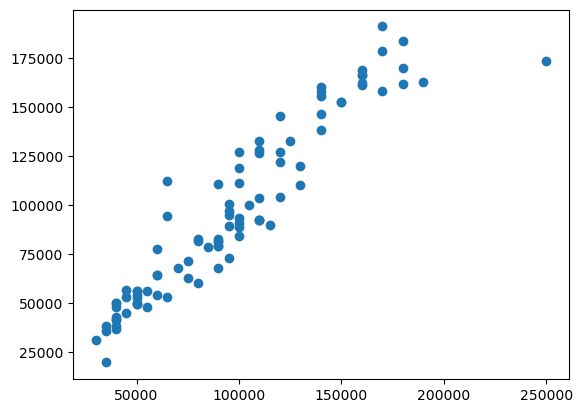

In [39]:
plt.scatter(y_test,y_pred)